In [6]:
from quantify_scheduler import Schedule
from quantify_scheduler.resources import ClockResource
from quantify_scheduler.operations import pulse_library
from quantify_scheduler.operations.pulse_library import IdlePulse,RampPulse,GaussPulse,NumericalPulse
from quantify_scheduler.backends.graph_compilation import SerialCompiler
from quantify_scheduler.device_under_test.quantum_device import QuantumDevice
from scipy.signal.windows import gaussian

import numpy as np

try:
    quantum_device = QuantumDevice("quantum_device")
    device_compiler = SerialCompiler("Device compiler", quantum_device)
except:
    pass
sched = Schedule("Qubit Reset - All possible pulse shapes")

readout_clock = ClockResource(name="q0.ro", freq=0e9)
sched.add_resource(readout_clock)

qc_t = 20e-9
qc_amp = -0.025
target_duration = 100e-9
target_amp = qc_t / target_duration * qc_amp 

sched.add(
    RampPulse(offset=qc_amp, amp=-target_amp, duration=qc_t, port="flux", clock="q0.ro")
)
sched.add(
    RampPulse(offset=qc_amp, amp=target_amp, duration=qc_t, port="flux", clock="q0.ro")
)
sched.add(
    RampPulse(offset=qc_amp, amp=-qc_amp, duration=qc_t, port="flux", clock="q0.ro")
)
sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)
sched.add(
    RampPulse(offset=0, amp=qc_amp, duration=qc_t, port="flux", clock="q0.ro")
)

comp_sched = device_compiler.compile(sched)
comp_sched.plot_pulse_diagram(plot_backend="plotly")



[ 0.         -0.43188626 -0.46887939 -0.4826699  -0.49086631 -0.49712443
 -0.50287557 -0.50913369 -0.5173301  -0.53112061]


(0.0, 2e-08)

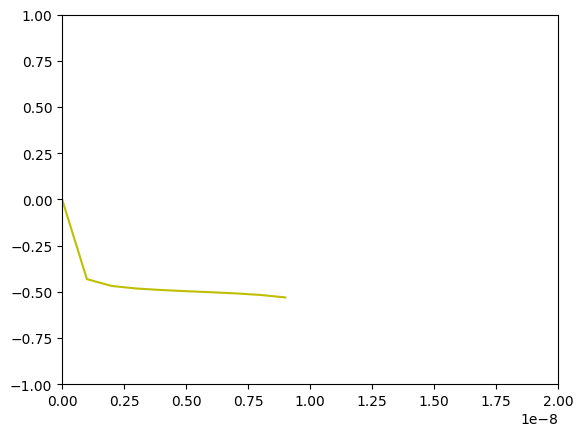

In [27]:
from scipy.signal.windows import gaussian
import matplotlib.pyplot as plt
from quantify_scheduler import Schedule
from quantify_scheduler.resources import ClockResource
from quantify_scheduler.operations import pulse_library
from quantify_scheduler.operations.pulse_library import IdlePulse,RampPulse,GaussPulse,NumericalPulse
from quantify_scheduler.backends.graph_compilation import SerialCompiler
from quantify_scheduler.device_under_test.quantum_device import QuantumDevice
from scipy.signal.windows import gaussian
import numpy as np

duration = 100
width = 10
space = 4
amp = 1
t_total = duration+space*width
tlist = np.arange(0,t_total,1)

# Square pulse of length L and unit amplitude centered at x+L/2
A = np.heaviside(tlist - space*width/2, 0) - np.heaviside(tlist - (duration+space*width/2), 0)

# Gaussian with mean (x+L/2) and std 1
f = np.exp(-pow(tlist-t_total/2,2)/(2*width**2))

g = np.convolve(A, f, mode = 'same') * amp  / np.sum(f)

# x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
# plt.plot(x, np.tan(x))
# plt.ylim(-5, 5)
def tan_pulse(int_duration=10,amp=-0.5, int_window=1/50, tail=1):
    if amp < 0:
        int_window = -int_window
    tlist_int = np.arange(0,int_duration,1)
    tan = int_window*np.tan((tlist_int/(int_duration+tail)-0.5)*np.pi)+amp
    if int_window<0:
        tan[tan>0] = 0
    else:
        tan[tan<0] = 0
    return tan

# amp = -0.5
# int_window = 1/50
# if amp < 0:
#     int_window = -int_window
int_duration = 10
# tail = 1.05
tlist_int = np.arange(0,int_duration,1)
# print(tlist_int)
# tan = int_window*np.tan((tlist_int/(int_duration*tail)-0.5)*np.pi)+amp
# if int_window<0:
#     tan[tan>0] = -0.1
# else:
#     tan[tan<0] = 0.1
tan = tan_pulse(int_duration=len(tlist_int))
print(tan)
plt.plot(tlist_int*1e-9, tan, 'y')
plt.ylim(-1,1)
plt.xlim(0,20e-9)

In [42]:
int_duration = 100
t = np.arange(0,int_duration,1)

try:
    quantum_device = QuantumDevice("quantum_device")
    device_compiler = SerialCompiler("Device compiler", quantum_device)
except:
    pass
sched = Schedule("Qubit Reset - All possible pulse shapes")

readout_clock = ClockResource(name="q0.ro", freq=0e9)
sched.add_resource(readout_clock)

def tan_pulse(int_duration=10,amp=-0.5, int_window=1/200, tail=1):
    if amp < 0:
        int_window = -int_window
    tlist_int = np.arange(0,int_duration,1)
    tan = int_window*np.tan((tlist_int/(int_duration+tail)-0.5)*np.pi)+amp
    if int_window<0:
        tan[tan>0] = 0
    else:
        tan[tan<0] = 0
    return tan

qc = sched.add(
    NumericalPulse(
        samples=tan_pulse(int_duration=int_duration,amp=-0.1, int_window=1/1000, tail=0),  # Numerical pulses can be complex as well.
        t_samples=t*1e-9,
        port="flux",
        clock="q0.ro",
    ),
    ref_pt="start",
    rel_time=0e-9,
)

comp_sched = device_compiler.compile(sched)
comp_sched.plot_pulse_diagram(plot_backend="plotly")

In [126]:
t = np.arange(0, 48.5e-9, 1e-9)
print(t)
1 * gaussian(len(t), std=0.12 * len(t))

[0.0e+00 1.0e-09 2.0e-09 3.0e-09 4.0e-09 5.0e-09 6.0e-09 7.0e-09 8.0e-09
 9.0e-09 1.0e-08 1.1e-08 1.2e-08 1.3e-08 1.4e-08 1.5e-08 1.6e-08 1.7e-08
 1.8e-08 1.9e-08 2.0e-08 2.1e-08 2.2e-08 2.3e-08 2.4e-08 2.5e-08 2.6e-08
 2.7e-08 2.8e-08 2.9e-08 3.0e-08 3.1e-08 3.2e-08 3.3e-08 3.4e-08 3.5e-08
 3.6e-08 3.7e-08 3.8e-08 3.9e-08 4.0e-08 4.1e-08 4.2e-08 4.3e-08 4.4e-08
 4.5e-08 4.6e-08 4.7e-08 4.8e-08]


array([2.41205195e-04, 4.75963727e-04, 9.12430720e-04, 1.69927937e-03,
       3.07445762e-03, 5.40394701e-03, 9.22767933e-03, 1.53077989e-02,
       2.46701532e-02, 3.86251152e-02, 5.87498241e-02, 8.68124866e-02,
       1.24622559e-01, 1.73800081e-01, 2.35473548e-01, 3.09936785e-01,
       3.96317237e-01, 4.92324720e-01, 5.94154193e-01, 6.96603307e-01,
       7.93433879e-01, 8.77960125e-01, 9.43795028e-01, 9.85642499e-01,
       1.00000000e+00, 9.85642499e-01, 9.43795028e-01, 8.77960125e-01,
       7.93433879e-01, 6.96603307e-01, 5.94154193e-01, 4.92324720e-01,
       3.96317237e-01, 3.09936785e-01, 2.35473548e-01, 1.73800081e-01,
       1.24622559e-01, 8.68124866e-02, 5.87498241e-02, 3.86251152e-02,
       2.46701532e-02, 1.53077989e-02, 9.22767933e-03, 5.40394701e-03,
       3.07445762e-03, 1.69927937e-03, 9.12430720e-04, 4.75963727e-04,
       2.41205195e-04])

In [18]:
sched = Schedule("Qubit Reset - Full Schedule")

readout_clock = ClockResource(name="q0.ro", freq=0e9)
sched.add_resource(readout_clock)

qc_t = 150e-9
cr_t = 600e-9
qc_amp = -0.025
target_duration = 100e-9
# target_amp = qc_t / target_duration * qc_amp 

sched.add(
    RampPulse(offset=0, amp=qc_amp, duration=qc_t, port="flux", clock="q0.ro")
)
sched.add(
    RampPulse(offset=-qc_amp, amp=qc_amp/4, duration=cr_t, port="flux", clock="q0.ro")
)
# sched.add(
#     RampPulse(offset=qc_amp, amp=-qc_amp, duration=qc_t, port="flux", clock="q0.ro")
# )
# sched.add(
#     RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
# )
# sched.add(
#     RampPulse(offset=0, amp=qc_amp, duration=qc_t, port="flux", clock="q0.ro")
# )

comp_sched = device_compiler.compile(sched)
comp_sched.plot_pulse_diagram(plot_backend="plotly")

In [8]:
# step 1 ge/gf reset
sched = Schedule("Qubit Reset - Step 1 - ge/gf qc")

readout_clock = ClockResource(name="q0.ro", freq=0e9)
sched.add_resource(readout_clock)

# qc_offset = -10
# qc_duration = 0.06e-6
# cr_duration = 0.25e-6
# amp = duration / target_duration* offset
# start = sched.add(IdlePulse(duration=4e-6))

qc_t = 0e-9
qc_amp = -0.025
amp2 = -0.01

sched.add(
    RampPulse(offset=qc_amp, amp=amp2, duration=qc_t, port="flux", clock="q0.ro")
)

comp_sched = device_compiler.compile(sched)
comp_sched.plot_pulse_diagram(plot_backend="plotly")

In [264]:
# step 3

sched = Schedule("Qubit Reset - Step 2 - ge/gf cq")

readout_clock = ClockResource(name="q0.ro", freq=0e9)
sched.add_resource(readout_clock)

# qc_offset = -10
# qc_duration = 0.06e-6
# cr_duration = 0.25e-6
# amp = duration / target_duration* offset
start = sched.add(IdlePulse(duration=4e-6))

qc_t = 20e-9
qc_amp = -0.025

sched.add(
    RampPulse(offset=qc_amp, amp=-qc_amp, duration=qc_t, port="flux", clock="q0.ro")
)

sched.add(
    RampPulse(offset=0, amp=qc_amp, duration=qc_t, port="flux", clock="q0.ro")
)


comp_sched = device_compiler.compile(sched)
comp_sched.plot_pulse_diagram(plot_backend="plotly")


In [269]:
# step 2

sched = Schedule("Qubit Reset - Step 3 - ge/gf cr")

readout_clock = ClockResource(name="q0.ro", freq=0e9)
sched.add_resource(readout_clock)

# qc_offset = -10
# qc_duration = 0.06e-6
# cr_duration = 0.25e-6
# amp = duration / target_duration* offset
start = sched.add(IdlePulse(duration=4e-6))

qc_t = 20e-9
qc_amp = -0.025

sched.add(
    RampPulse(offset=qc_amp, amp=-qc_amp, duration=qc_t, port="flux", clock="q0.ro")
)

# for e state
qc_t = 135e-9
qc_amp = 0.05

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)
# for f state
qc_t = 25e-9
qc_amp = 0.06

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)

qc_t = 20e-9
qc_amp = -0.025

sched.add(
    RampPulse(offset=0, amp=qc_amp, duration=qc_t, port="flux", clock="q0.ro")
)

comp_sched = device_compiler.compile(sched)
comp_sched.plot_pulse_diagram(plot_backend="plotly")


In [255]:
# step 3

sched = Schedule("Qubit Reset - Step 3 - fg qc")

readout_clock = ClockResource(name="q0.ro", freq=0e9)
sched.add_resource(readout_clock)

# qc_offset = -10
# qc_duration = 0.06e-6
# cr_duration = 0.25e-6
# amp = duration / target_duration* offset
start = sched.add(IdlePulse(duration=4e-6))

qc_t = 20e-9
qc_amp = -0.025

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)


comp_sched = device_compiler.compile(sched)
comp_sched.plot_pulse_diagram(plot_backend="plotly")

In [271]:
# step 4

sched = Schedule("Qubit Reset - Step 4 - fg qc check")

readout_clock = ClockResource(name="q0.ro", freq=0e9)
sched.add_resource(readout_clock)

# qc_offset = -10
# qc_duration = 0.06e-6
# cr_duration = 0.25e-6
# amp = duration / target_duration* offset
start = sched.add(IdlePulse(duration=4e-6))

qc_t = 20e-9
qc_amp = -0.025

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)

# for f state
qc_t = 135e-9
qc_amp = 0.06

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)

# for f state
qc_t = 25e-9
qc_amp = 0.06

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)

qc_t = 20e-9
qc_amp = -0.025

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)

comp_sched = device_compiler.compile(sched)
comp_sched.plot_pulse_diagram(plot_backend="plotly")

In [262]:
# step 5

sched = Schedule("Qubit Reset - Step 5 - full")

readout_clock = ClockResource(name="q0.ro", freq=0e9)
sched.add_resource(readout_clock)

# qc_offset = -10
# qc_duration = 0.06e-6
# cr_duration = 0.25e-6
# amp = duration / target_duration* offset
start = sched.add(IdlePulse(duration=4e-6))


qc_t = 20e-9
qc_amp = -0.025

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)

qc_t = 250e-9
qc_amp = 0.06

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)

qc_t = 20e-9
qc_amp = -0.025

sched.add(
    RampPulse(offset=qc_amp, amp=-qc_amp, duration=qc_t, port="flux", clock="q0.ro")
)

# for e state
qc_t = 200e-9
qc_amp = 0.05

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)
# for f state
qc_t = 250e-9
qc_amp = 0.06

sched.add(
    RampPulse(offset=qc_amp, amp=0, duration=qc_t, port="flux", clock="q0.ro")
)



comp_sched = device_compiler.compile(sched)
comp_sched.plot_pulse_diagram(plot_backend="plotly")

In [ ]:
duration = 100
width = 10
space = 4
amp = 1
t_total = duration+space*width
tlist = np.arange(0,t_total,1)

# Square pulse of length L and unit amplitude centered at x+L/2
A = np.heaviside(tlist - space*width/2, 0) - np.heaviside(tlist - (duration+space*width/2), 0)

# Gaussian with mean (x+L/2) and std 1
f = np.exp(-pow(tlist-t_total/2,2)/(2*width**2))

g = np.convolve(A, f, mode = 'same') * amp  / np.sum(f)
plt.plot(tlist*1e-9, A, 'r')
plt.plot(tlist*1e-9, f, 'b')
plt.plot(tlist*1e-9, g, 'g')

# t = np.arange(0, 48.5e-9, 1e-9)


# gaussian_pulse = sched.add(
#     NumericalPulse(
#         samples=0.2 * gaussian(len(t), std=0.12 * len(t)),  # Numerical pulses can be complex as well.
#         t_samples=t,
#         port="flux",
#         clock="q0.ro",
#     ),
#     ref_pt="start",
#     rel_time=0e-9,
# )

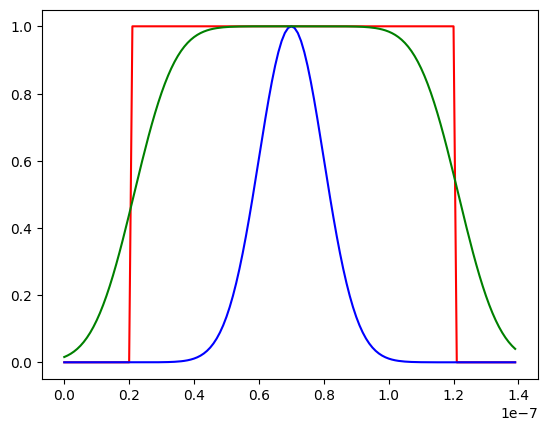

In [229]:
duration = 100
width = 10
space = 4
amp = 1
t_total = duration+space*width
tlist = np.arange(0,t_total,1)

# Square pulse of length L and unit amplitude centered at x+L/2
A = np.heaviside(tlist - space*width/2, 0) - np.heaviside(tlist - (duration+space*width/2), 0)

# Gaussian with mean (x+L/2) and std 1
f = np.exp(-pow(tlist-t_total/2,2)/(2*width**2))

g = np.convolve(A, f, mode = 'same') * amp  / np.sum(f)
plt.plot(tlist*1e-9, A, 'r')
plt.plot(tlist*1e-9, f, 'b')
plt.plot(tlist*1e-9, g, 'g')


In [228]:
t = 100
w =20
amp = 0.5
gauss = gaussian(w, std= 0.12*w)
square = [0]*w+[amp]*int(t)+[0]*w
gauss_square = np.convolve(gauss, square,mode = 'same') * dt / np.sum(f)
plt.plot(square)
plt.plot(gauss_square)

NameError: name 'dt' is not defined

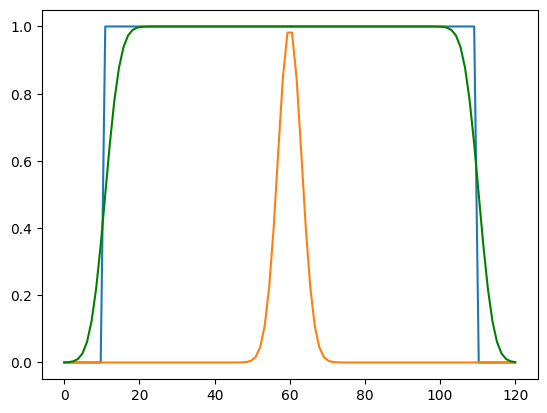